# Heuristicas

In [51]:
import utils
import simulator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA = "../data/sim.dat"
POWERS = "../data/sim_powers.tsv"

In [55]:
def read_powers() -> pd.DataFrame:
    return pd.read_csv(
        POWERS,
        sep=' ',
        header=None,
        names=["team", "power"],
    )

def read_sim_ranking(path: str):
    powers = read_powers()
    ranking = utils.read_ranking(path)
    ranking["power"] = (ranking.index + 1).map(powers.set_index("team")["power"])
    ranking["team"] = (ranking.index+1)
    return ranking

In [ ]:
utils.run(DATA, utils.METHOD_CMM)
utils.run(DATA, utils.METHOD_WP)

In [ ]:
read_sim_ranking(utils.METHOD_CMM).sort_values("rating", ascending=False)

In [ ]:
utils.analyze_data(DATA)

In [ ]:
# iterar e imprimir boxplot

TEAM = 20
ITER = 100

results = pd.DataFrame(columns=["rating", "wins"])

for i in tqdm(range(ITER)):
    simulator.simulate(team_count=20)
    utils.run(DATA, utils.METHOD_CMM)
    ranking = read_sim_ranking(utils.METHOD_CMM)
    analyzed_data = utils.analyze_data(DATA)
    results.loc[i] = [
        ranking.set_index("team").at[TEAM, "rating"],
        analyzed_data.set_index("team").loc[TEAM].values[2] # wins
    ]

print("Done!")

In [ ]:
sns.scatterplot(results["wins"], results["rating"])

In [58]:
# correr progresivamente
WEEKS = 20
TEAMS = 10
simulator.simulate(team_count=TEAMS, weeks=WEEKS)
data = utils.read_mn(DATA).set_index("date")

ratings_by_week = pd.DataFrame()

for week in tqdm(range(1, WEEKS+1)):
    data_til_week = DATA + f".week{week}"
    spliced = data.loc[:week]
    with open(data_til_week, "w") as f:
        print(f"{TEAMS} {spliced.shape[0]}", file=f)

    spliced.to_csv(data_til_week, sep=" ", mode="a", header=False)
    
    utils.run(data_til_week, utils.METHOD_CMM)
    ranking = read_sim_ranking(data_til_week+utils.METHOD_CMM+utils.OUT)
    ranking["week"] = week
    ratings_by_week = pd.concat([ratings_by_week, ranking])

ratings_by_week

100%|██████████| 20/20 [00:01<00:00, 19.39it/s]


,rating,power,team,week
0,0.118011,10.0,1,1
1,0.301344,20.0,2,1
2,0.370968,30.0,3,1
3,0.354839,40.0,4,1
4,0.483871,50.0,5,1
...,...,...,...,...
5,0.584063,60.0,6,20
6,0.612084,70.0,7,20
7,0.651489,80.0,8,20
8,0.710158,90.0,9,20


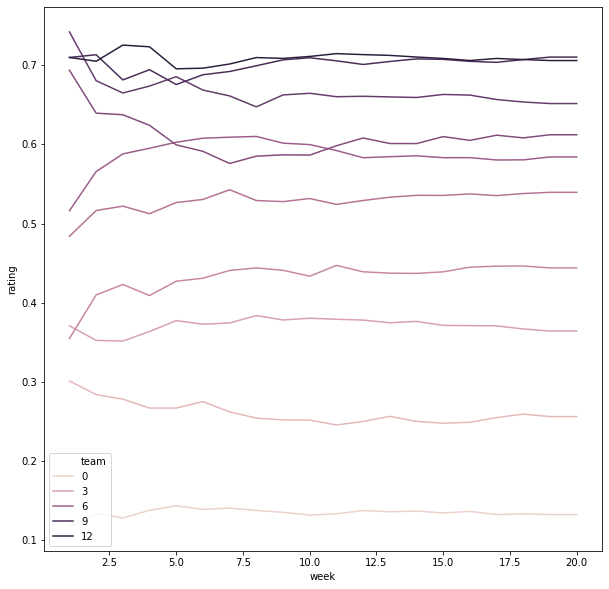

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10)) 
sns.lineplot(data=ratings_by_week, x="week", y="rating", hue="team")

In [22]:
df = pd.DataFrame({
    "week": [1, 1, 2, 2, 3, 3],
    "other": [2, 2, 4, 4, 5, 5],
})

df.set_index("week").loc[:3]

other = pd.DataFrame({"other": [2, 2, 4, 4, 5, 5]})
other["week"] = 4
cc = pd.concat([df, other])
cc

,week,other
0,1,2
1,1,2
2,2,4
3,2,4
4,3,5
5,3,5
0,4,2
1,4,2
2,4,4
3,4,4


In [ ]:
def heuristic(games: List[simulator.Game]) -> List[simulator.Game]:
    # calculas cmm
    # run()
    # modificas los partididos segun tu heuristica
    # run()
    # ves el ranking
    